In [213]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [214]:
df = pd.read_csv('bank-mock-dataset-1000.csv')
encoder = LabelEncoder()
scaler = StandardScaler

In [160]:
df.head(5)

,customer_id,age,region,segment,salary,account_type,credit_history_depth,loan_amount,interest_income,fees_income,operational_cost,default_status,transaction_volume,digital_channel_usage,monthly_profit,risk_score
0,1,56,Central,Retail,2416816.39,Business,7,866232.87,43206.35,13650.16,23523.99,0,436,0.18,-1467.06,0.43
1,2,69,South,Retail,1914542.59,Savings,8,444183.95,59969.14,299.40,4922.75,0,504,0.86,5672.96,0.50
2,3,46,South,Corporate,2379393.13,Savings,19,137052.80,58205.04,2467.83,11940.65,0,151,0.39,31088.23,0.90
3,4,32,South,Corporate,1771224.23,Savings,16,862211.42,50389.79,1449.87,14853.13,0,485,0.00,42020.91,0.26
4,5,60,South,Retail,780227.91,Savings,7,816092.35,28783.15,18164.40,3579.16,0,439,0.27,8897.38,0.87


In [161]:
 df2 = df.drop(['account_type', 'credit_history_depth'], axis =1)

In [162]:
df2.head()

,customer_id,age,region,segment,salary,loan_amount,interest_income,fees_income,operational_cost,default_status,transaction_volume,digital_channel_usage,monthly_profit,risk_score
0,1,56,Central,Retail,2416816.39,866232.87,43206.35,13650.16,23523.99,0,436,0.18,-1467.06,0.43
1,2,69,South,Retail,1914542.59,444183.95,59969.14,299.40,4922.75,0,504,0.86,5672.96,0.50
2,3,46,South,Corporate,2379393.13,137052.80,58205.04,2467.83,11940.65,0,151,0.39,31088.23,0.90
3,4,32,South,Corporate,1771224.23,862211.42,50389.79,1449.87,14853.13,0,485,0.00,42020.91,0.26
4,5,60,South,Retail,780227.91,816092.35,28783.15,18164.40,3579.16,0,439,0.27,8897.38,0.87


In [163]:
df2.isnull().sum()

customer_id              0
age                      0
region                   0
segment                  0
salary                   0
loan_amount              0
interest_income          0
fees_income              0
operational_cost         0
default_status           0
transaction_volume       0
digital_channel_usage    0
monthly_profit           0
risk_score               0
dtype: int64

In [164]:
df2.isna().sum()

customer_id              0
age                      0
region                   0
segment                  0
salary                   0
loan_amount              0
interest_income          0
fees_income              0
operational_cost         0
default_status           0
transaction_volume       0
digital_channel_usage    0
monthly_profit           0
risk_score               0
dtype: int64

In [165]:
df.describe()

,customer_id,age,salary,credit_history_depth,loan_amount,interest_income,fees_income,operational_cost,default_status,transaction_volume,digital_channel_usage,monthly_profit,risk_score
count,1000.000000,1000.00000,1.000000e+03,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,1.271392e+06,10.10900,495173.34412,40098.420140,12881.137440,15105.088670,0.123000,298.280000,0.502200,22051.252490,0.491970
std,288.819436,14.99103,7.058871e+05,5.55103,292525.96729,22863.976599,7276.492134,8461.945307,0.328602,171.876843,0.294824,15933.995148,0.296001
min,1.000000,18.00000,5.002851e+04,1.00000,627.52000,128.100000,139.330000,340.260000,0.000000,5.000000,0.000000,-4933.800000,0.000000
25%,250.750000,31.00000,6.585353e+05,5.00000,237326.89750,21191.342500,6719.582500,8003.542500,0.000000,153.000000,0.247500,7867.355000,0.230000
50%,500.500000,44.00000,1.275932e+06,10.00000,499178.14000,40695.040000,13122.985000,15305.340000,0.000000,298.000000,0.490000,21898.355000,0.475000
75%,750.250000,56.00000,1.884518e+06,15.00000,733819.64000,59854.315000,19251.730000,22509.317500,0.000000,447.250000,0.770000,35455.615000,0.760000
max,1000.000000,69.00000,2.497287e+06,19.00000,999849.24000,79980.130000,24993.560000,29985.040000,1.000000,598.000000,1.000000,49936.470000,1.000000


In [166]:
df2

,customer_id,age,region,segment,salary,loan_amount,interest_income,fees_income,operational_cost,default_status,transaction_volume,digital_channel_usage,monthly_profit,risk_score
0,1,56,Central,Retail,2416816.39,866232.87,43206.35,13650.16,23523.99,0,436,0.18,-1467.06,0.43
1,2,69,South,Retail,1914542.59,444183.95,59969.14,299.40,4922.75,0,504,0.86,5672.96,0.50
2,3,46,South,Corporate,2379393.13,137052.80,58205.04,2467.83,11940.65,0,151,0.39,31088.23,0.90
3,4,32,South,Corporate,1771224.23,862211.42,50389.79,1449.87,14853.13,0,485,0.00,42020.91,0.26
4,5,60,South,Retail,780227.91,816092.35,28783.15,18164.40,3579.16,0,439,0.27,8897.38,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,South,SME,422518.99,796451.77,1603.68,1404.90,5310.44,0,216,0.66,32367.47,0.95
996,997,64,Central,Retail,1172892.81,547062.99,46605.51,22704.61,9679.13,0,287,0.47,26099.39,0.99
997,998,62,Central,Retail,910487.50,649952.10,55906.69,18059.32,17938.05,0,199,0.81,18995.91,0.04
998,999,35,North,SME,279752.49,753768.20,68309.28,16959.95,19471.69,1,34,0.16,24697.15,0.15


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   region                 1000 non-null   object 
 3   segment                1000 non-null   object 
 4   salary                 1000 non-null   float64
 5   account_type           1000 non-null   object 
 6   credit_history_depth   1000 non-null   int64  
 7   loan_amount            1000 non-null   float64
 8   interest_income        1000 non-null   float64
 9   fees_income            1000 non-null   float64
 10  operational_cost       1000 non-null   float64
 11  default_status         1000 non-null   int64  
 12  transaction_volume     1000 non-null   int64  
 13  digital_channel_usage  1000 non-null   float64
 14  monthly_profit         1000 non-null   float64
 15  risk_

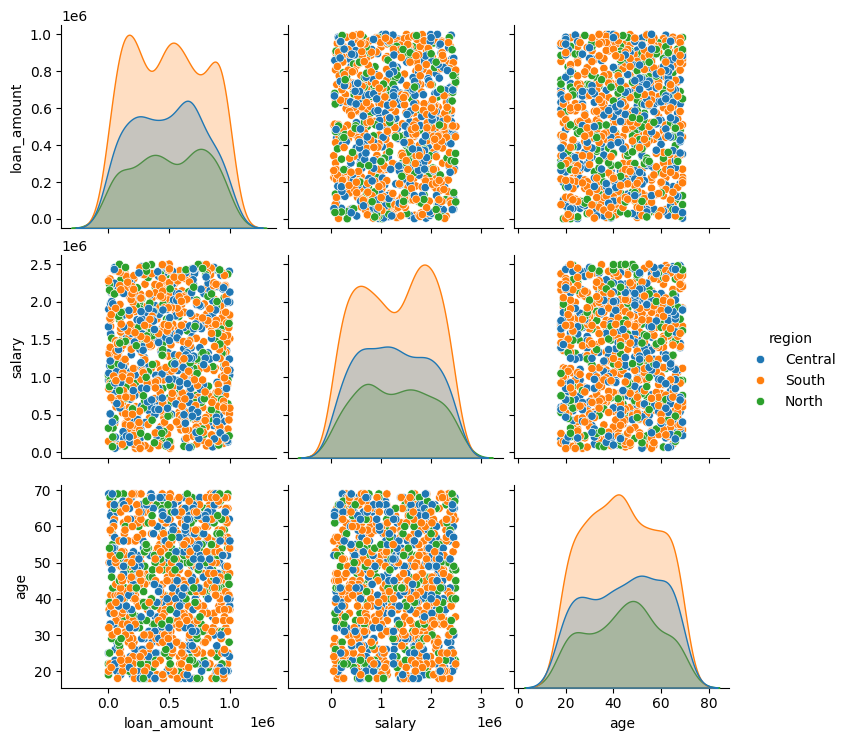

In [168]:
sns.pairplot(df2, vars = ['loan_amount', 'salary', 'age'], hue = "region")

In [169]:
# plt.figure(1 , figsize = (15 , 7))
# plt.title('Scatter plot of Age v/s Risk Score', fontsize = 20)
# plt.xlabel('Age')
# plt.ylabel('risk_score')
# plt.scatter( x = 'age', y = 'risk_score', data = df2, s = 80)
# plt.show()

In [170]:
X1 = df2[['age' , 'risk_score']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\Users\MW50001196\AppData\Roaming\Python\Python313\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


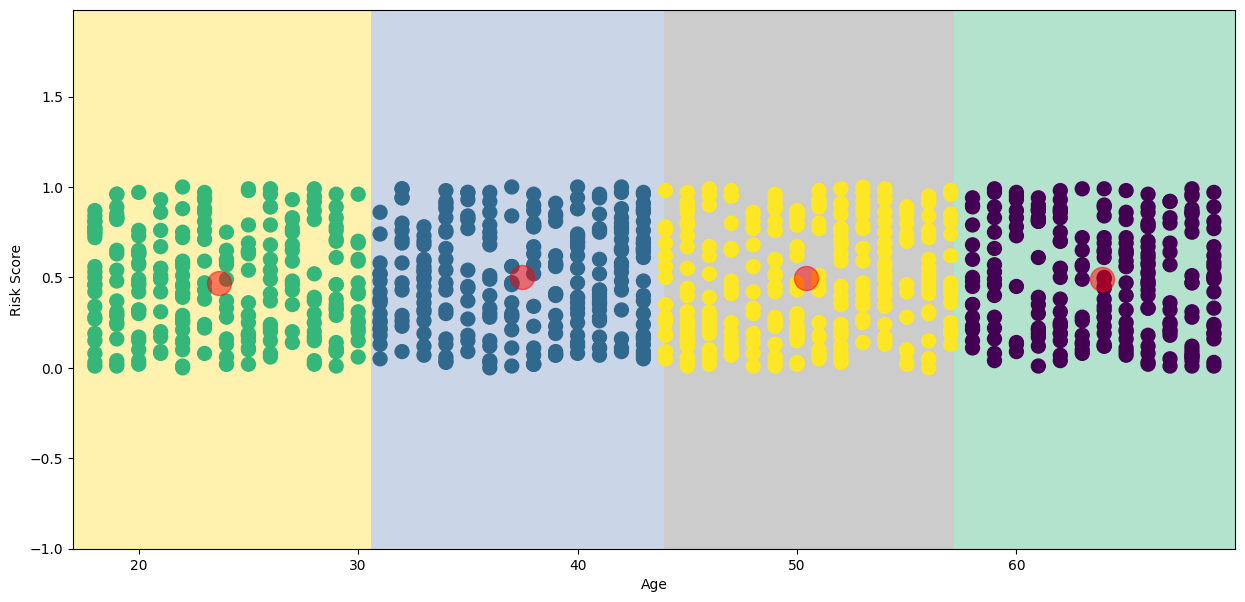

In [171]:
#Applying K-Means and Vizualizing them

algorithm = (KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'age', y = 'risk_score', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Risk Score') , plt.xlabel('Age')
plt.show()

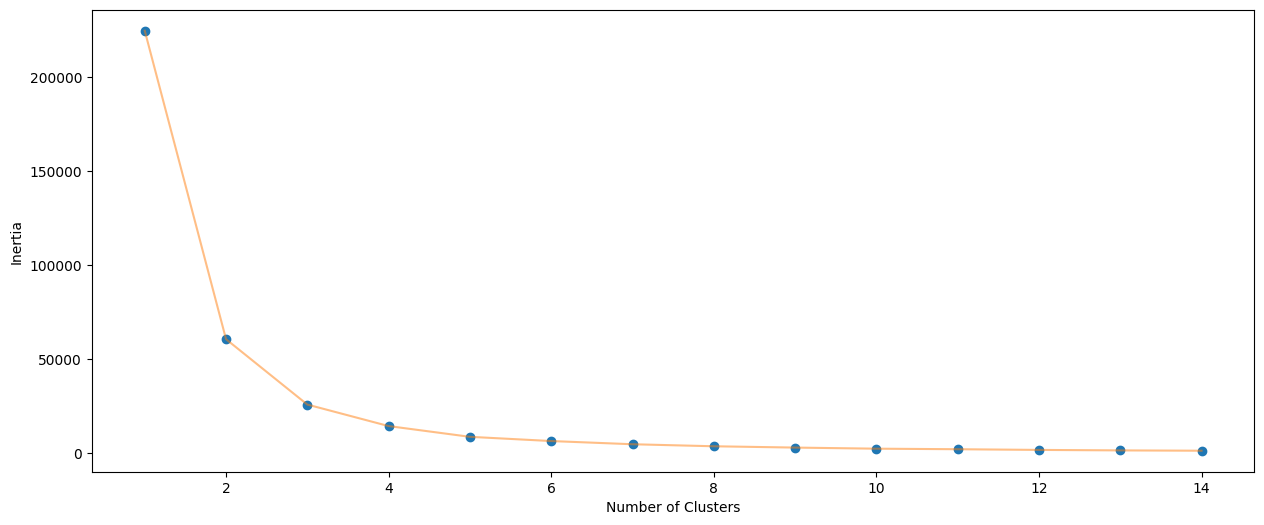

In [172]:
#Determining the optimal number of clusters using Elbow Method 

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [141]:
##The Optimum number of clusters is at least 4

In [142]:
#Part B — Supervised Learning (Profit Forecasting Model)

In [173]:
df2['profit_this_year'] = df2['monthly_profit']*12

In [175]:
df2

,customer_id,age,region,segment,salary,loan_amount,interest_income,fees_income,operational_cost,default_status,transaction_volume,digital_channel_usage,monthly_profit,risk_score,profit_this_year
0,1,56,Central,Retail,2416816.39,866232.87,43206.35,13650.16,23523.99,0,436,0.18,-1467.06,0.43,-17604.72
1,2,69,South,Retail,1914542.59,444183.95,59969.14,299.40,4922.75,0,504,0.86,5672.96,0.50,68075.52
2,3,46,South,Corporate,2379393.13,137052.80,58205.04,2467.83,11940.65,0,151,0.39,31088.23,0.90,373058.76
3,4,32,South,Corporate,1771224.23,862211.42,50389.79,1449.87,14853.13,0,485,0.00,42020.91,0.26,504250.92
4,5,60,South,Retail,780227.91,816092.35,28783.15,18164.40,3579.16,0,439,0.27,8897.38,0.87,106768.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,South,SME,422518.99,796451.77,1603.68,1404.90,5310.44,0,216,0.66,32367.47,0.95,388409.64
996,997,64,Central,Retail,1172892.81,547062.99,46605.51,22704.61,9679.13,0,287,0.47,26099.39,0.99,313192.68
997,998,62,Central,Retail,910487.50,649952.10,55906.69,18059.32,17938.05,0,199,0.81,18995.91,0.04,227950.92
998,999,35,North,SME,279752.49,753768.20,68309.28,16959.95,19471.69,1,34,0.16,24697.15,0.15,296365.80


In [177]:
df2['predicted_profit_next_year'] = ''

In [178]:
df2

,customer_id,age,region,segment,salary,loan_amount,interest_income,fees_income,operational_cost,default_status,transaction_volume,digital_channel_usage,monthly_profit,risk_score,profit_this_year,predicted_profit_next_year
0,1,56,Central,Retail,2416816.39,866232.87,43206.35,13650.16,23523.99,0,436,0.18,-1467.06,0.43,-17604.72,
1,2,69,South,Retail,1914542.59,444183.95,59969.14,299.40,4922.75,0,504,0.86,5672.96,0.50,68075.52,
2,3,46,South,Corporate,2379393.13,137052.80,58205.04,2467.83,11940.65,0,151,0.39,31088.23,0.90,373058.76,
3,4,32,South,Corporate,1771224.23,862211.42,50389.79,1449.87,14853.13,0,485,0.00,42020.91,0.26,504250.92,
4,5,60,South,Retail,780227.91,816092.35,28783.15,18164.40,3579.16,0,439,0.27,8897.38,0.87,106768.56,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,South,SME,422518.99,796451.77,1603.68,1404.90,5310.44,0,216,0.66,32367.47,0.95,388409.64,
996,997,64,Central,Retail,1172892.81,547062.99,46605.51,22704.61,9679.13,0,287,0.47,26099.39,0.99,313192.68,
997,998,62,Central,Retail,910487.50,649952.10,55906.69,18059.32,17938.05,0,199,0.81,18995.91,0.04,227950.92,
998,999,35,North,SME,279752.49,753768.20,68309.28,16959.95,19471.69,1,34,0.16,24697.15,0.15,296365.80,


In [185]:
X = df2.operational_cost
y = df2.monthly_profit

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [221]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.